In [18]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def download_bq_table_to_dataframe(project_id, dataset_id, table_id):
    # Create a BigQuery client
    client = bigquery.Client(project=project_id)

    # Construct the fully qualified table ID
    table_ref = f"{project_id}.{dataset_id}.{table_id}"

    # Query the table
    query = f"SELECT * FROM `{table_ref}`"
    df = client.query(query).to_dataframe()

    return df

In [3]:
project_id = "brain-flash-dev"
dataset_id = "dagster_common"
table_id = "CN_data_to_fetch"

In [5]:
df = dataframe = download_bq_table_to_dataframe(project_id, dataset_id, table_id)

In [6]:
df.head()

,TEST_ITEM_COMMUNICATIONKEY,TWIN_ITEM_COMMUNICATIONKEY,CALENDAR_DATE,ANSPRACHE,ANSPRACHE_MARKETING_IMPUTED,FRACTION_SOLDOUT,FIRST_ANSPRACHE_DATE,TWIN_COUNT
0,804245827,229413634,2018-11-25,4,<NA>,1.0,2018-01-04,10
1,735286989,497799280,2018-06-01,0,<NA>,NaN,2018-01-02,10
2,735286989,497799280,2018-06-03,<NA>,<NA>,NaN,2018-01-02,10
3,735286989,497799280,2018-06-05,<NA>,<NA>,NaN,2018-01-02,10
4,735286989,497799280,2018-06-02,<NA>,<NA>,NaN,2018-01-02,10


In [7]:
df.describe()

,TEST_ITEM_COMMUNICATIONKEY,TWIN_ITEM_COMMUNICATIONKEY,ANSPRACHE,ANSPRACHE_MARKETING_IMPUTED,FRACTION_SOLDOUT,TWIN_COUNT
count,360790.0,360790.0,360127.0,346295.0,359944.000000,360790.0
mean,941820769.073716,691011047.610228,1.765288,1.780211,0.238756,10.0
std,125322741.776258,132851211.323946,4.826541,4.515837,0.302700,0.0
min,716679764.0,980275.0,-1.0,-1.0,0.000000,10.0
25%,832928980.0,599334238.0,0.0,0.0,0.000000,10.0
50%,896329914.0,667747191.0,0.0,0.0,0.125000,10.0
75%,1066797131.0,803573824.0,2.0,2.0,0.428571,10.0
max,1091540912.0,1091540912.0,545.0,255.0,1.000000,10.0


In [12]:
test_set = df.query("TEST_ITEM_COMMUNICATIONKEY == 804245827")

/tmp/ipykernel_80481/1107687853.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  test_set = df.query("TEST_ITEM_COMMUNICATIONKEY == 804245827")


In [13]:
test_set.head()

,TEST_ITEM_COMMUNICATIONKEY,TWIN_ITEM_COMMUNICATIONKEY,CALENDAR_DATE,ANSPRACHE,ANSPRACHE_MARKETING_IMPUTED,FRACTION_SOLDOUT,FIRST_ANSPRACHE_DATE,TWIN_COUNT
0,804245827,229413634,2018-11-25,4,<NA>,1.0,2018-01-04,10
2025,804245827,579051295,2018-11-27,0,<NA>,1.0,2018-01-10,10
2026,804245827,579051295,2018-10-31,0,<NA>,1.0,2018-01-10,10
2027,804245827,579051295,2018-12-02,0,<NA>,1.0,2018-01-10,10
2028,804245827,579051295,2018-12-03,0,<NA>,1.0,2018-01-10,10


In [16]:
test_set.dtypes

TEST_ITEM_COMMUNICATIONKEY       Int64
TWIN_ITEM_COMMUNICATIONKEY       Int64
CALENDAR_DATE                   dbdate
ANSPRACHE                        Int64
ANSPRACHE_MARKETING_IMPUTED      Int64
FRACTION_SOLDOUT               float64
FIRST_ANSPRACHE_DATE            dbdate
TWIN_COUNT                       Int64
dtype: object

array([<Axes: xlabel='CALENDAR_DATE'>], dtype=object)

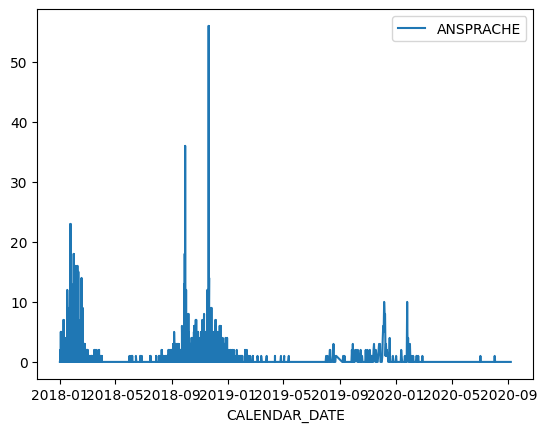

In [15]:
#plotte die ANSPRACHE aus dem test_set und unterteile die zeitreihen nach TWIN_ITEM_COMMUNICATIONKEY

test_set.plot(x='CALENDAR_DATE', y='ANSPRACHE', kind='line', subplots=True)

In [20]:
df.isna().sum()

TEST_ITEM_COMMUNICATIONKEY         0
TWIN_ITEM_COMMUNICATIONKEY         0
CALENDAR_DATE                      0
ANSPRACHE                        663
ANSPRACHE_MARKETING_IMPUTED    14495
FRACTION_SOLDOUT                 846
FIRST_ANSPRACHE_DATE               0
TWIN_COUNT                         0
dtype: int64

In [21]:
df["ANSPRACHE"].fillna(0, inplace=True)
df["ANSPRACHE_MARKETING_IMPUTED"].fillna(0, inplace=True)


In [24]:
df["CALENDAR_DATE"] = pd.to_datetime(df["CALENDAR_DATE"])

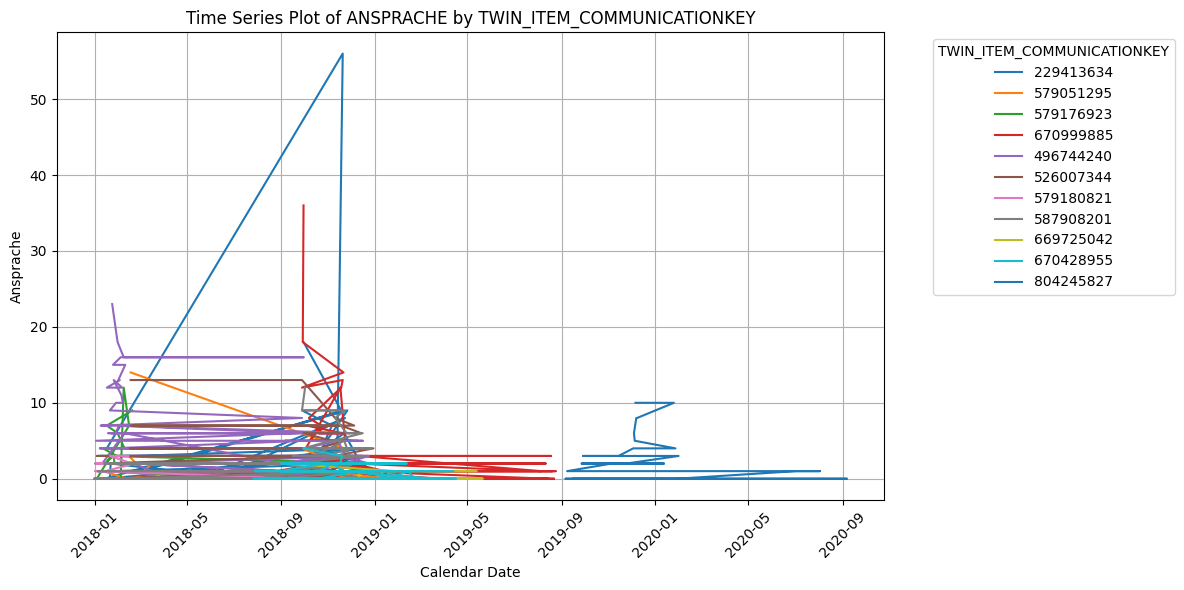

In [25]:
# Create the plot
plt.figure(figsize=(12, 6))

# Loop through each unique category in TWIN_ITEM_COMMUNICATIONKEY and plot its time series
for key in test_set["TWIN_ITEM_COMMUNICATIONKEY"].unique():
    subset = test_set[test_set["TWIN_ITEM_COMMUNICATIONKEY"] == key]
    plt.plot(subset["CALENDAR_DATE"], subset["ANSPRACHE"], label=key)

# Formatting the plot
plt.xlabel("Calendar Date")
plt.ylabel("Ansprache")
plt.title("Time Series Plot of ANSPRACHE by TWIN_ITEM_COMMUNICATIONKEY")
plt.legend(title="TWIN_ITEM_COMMUNICATIONKEY", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()